# **Eksperimen Wine Quality Dataset - Zidan Mubarak**

Notebook ini berisi eksperimen lengkap untuk preprocessing dataset Wine Quality.

# **1. Perkenalan Dataset**

Dataset yang digunakan adalah **Wine Quality Dataset** yang berisi informasi tentang karakteristik kimia wine dan rating kualitasnya.

**Sumber Dataset**: Wine Quality Dataset

**Deskripsi**:
- Dataset berisi 1143 sampel wine dengan 13 fitur
- Fitur mencakup: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, dan Id
- Target variable: quality (rating kualitas wine dari 3-8)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import library untuk data manipulation
import pandas as pd
import numpy as np

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Setting untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ Library berhasil diimport!")

✓ Library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load dataset
df = pd.read_csv('../WineQT_raw/WineQT.csv')

# Tampilkan informasi dasar dataset
print("=" * 50)
print("INFORMASI DATASET")
print("=" * 50)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\n5 Baris Pertama:")
display(df.head())

print("\nInfo Dataset:")
df.info()

INFORMASI DATASET
Jumlah baris: 1143
Jumlah kolom: 13

5 Baris Pertama:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Statistik Deskriptif

In [3]:
# Statistik deskriptif
print("=" * 50)
print("STATISTIK DESKRIPTIF")
print("=" * 50)
display(df.describe())

# Cek tipe data
print("\nTipe Data:")
print(df.dtypes)

STATISTIK DESKRIPTIF


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000



Tipe Data:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


## 4.2 Missing Values Analysis

In [4]:
# Cek missing values
print("=" * 50)
print("MISSING VALUES")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n✓ Tidak ada missing values!")
else:
    print(f"\nTotal missing values: {missing_df['Missing Count'].sum()}")

MISSING VALUES
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

✓ Tidak ada missing values!


## 4.3 Duplicate Data Analysis

In [5]:
# Cek data duplikat
print("=" * 50)
print("DUPLICATE DATA")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")
print(f"Persentase duplikat: {(duplicates/len(df)*100):.2f}%")

if duplicates > 0:
    print("\nContoh data duplikat:")
    display(df[df.duplicated(keep=False)].head(10))

DUPLICATE DATA
Jumlah baris duplikat: 0
Persentase duplikat: 0.00%


## 4.4 Distribution Analysis

DISTRIBUSI QUALITY
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


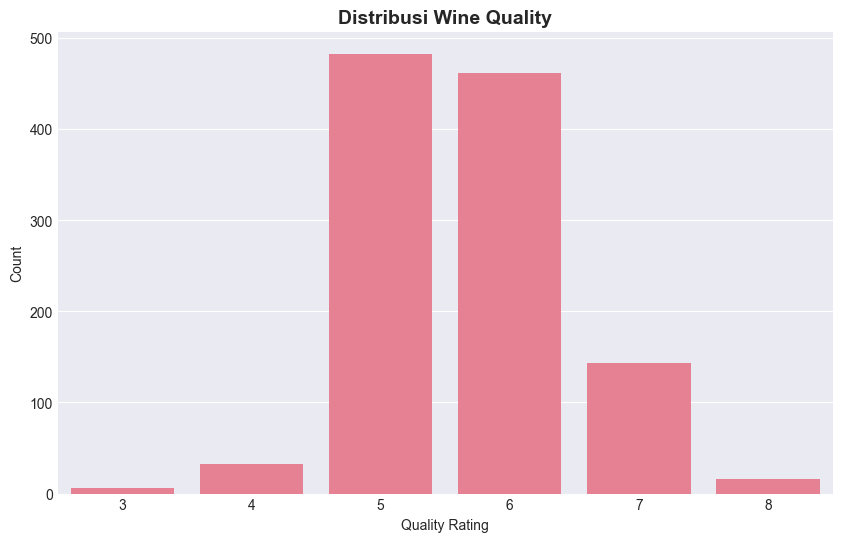

In [6]:
# Distribusi target variable (quality)
print("=" * 50)
print("DISTRIBUSI QUALITY")
print("=" * 50)
print(df['quality'].value_counts().sort_index())

# Visualisasi distribusi quality
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality')
plt.title('Distribusi Wine Quality', fontsize=14, fontweight='bold')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.show()

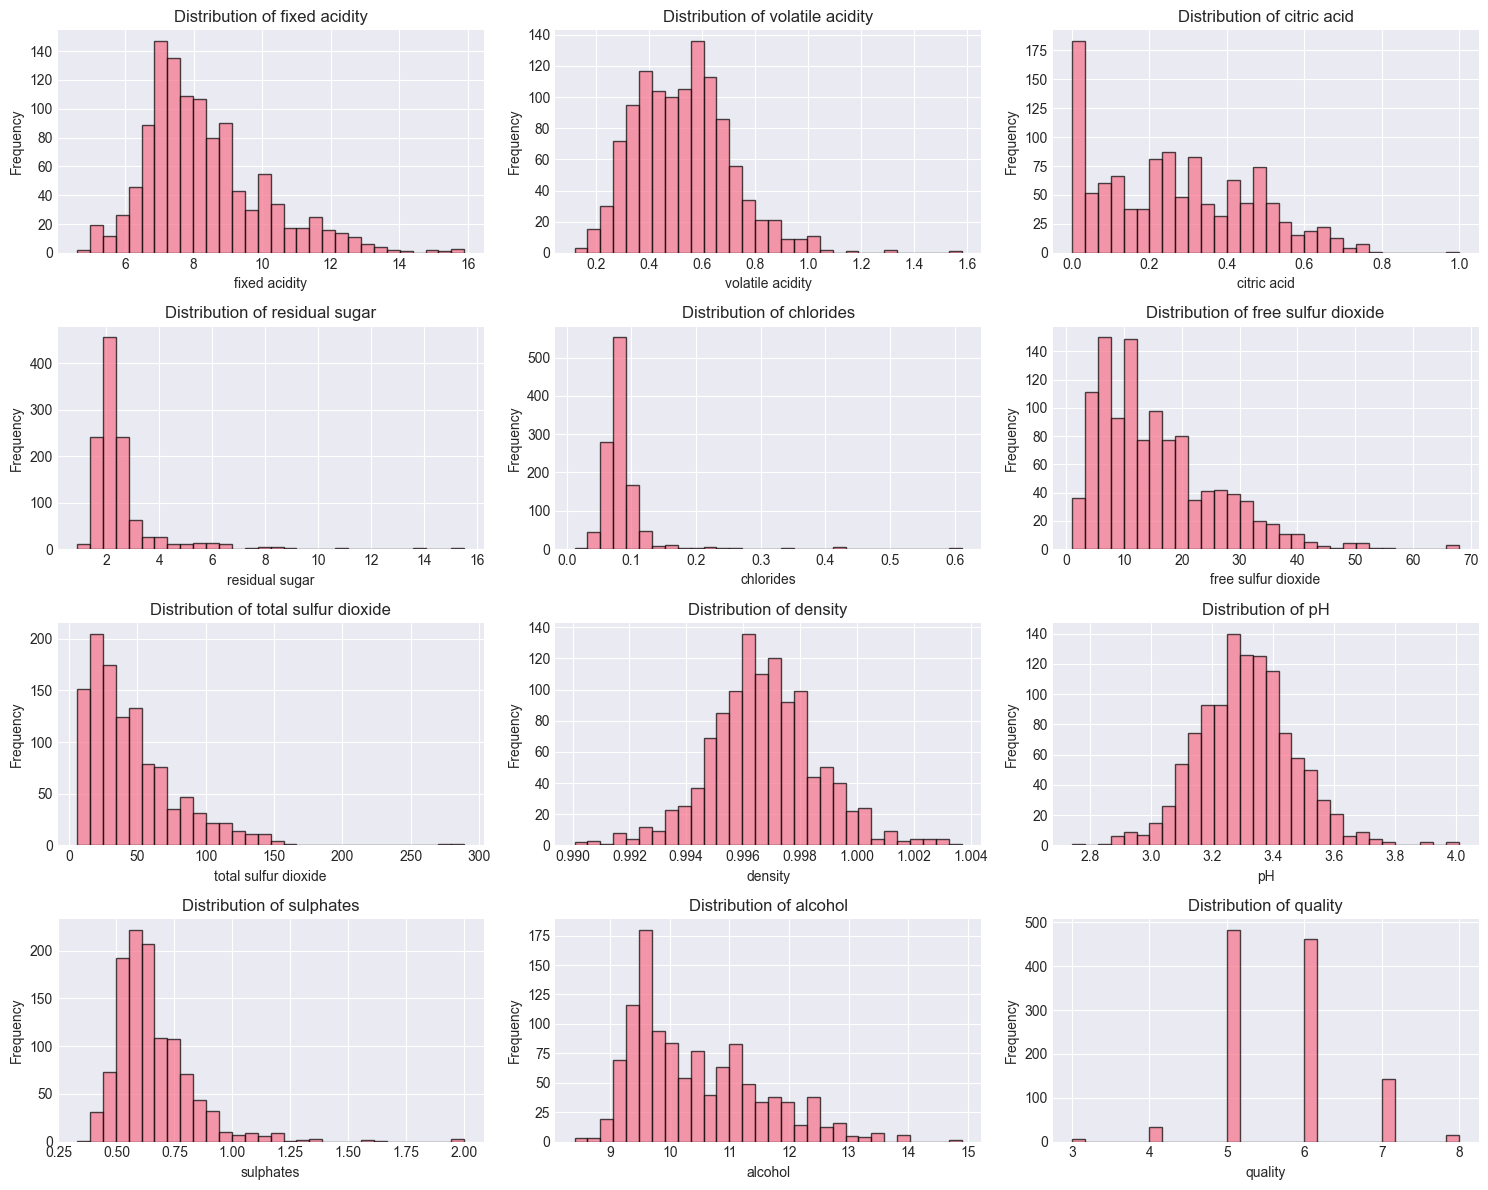

In [7]:
# Distribusi fitur numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('Id')  # Remove Id column

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4.5 Correlation Analysis

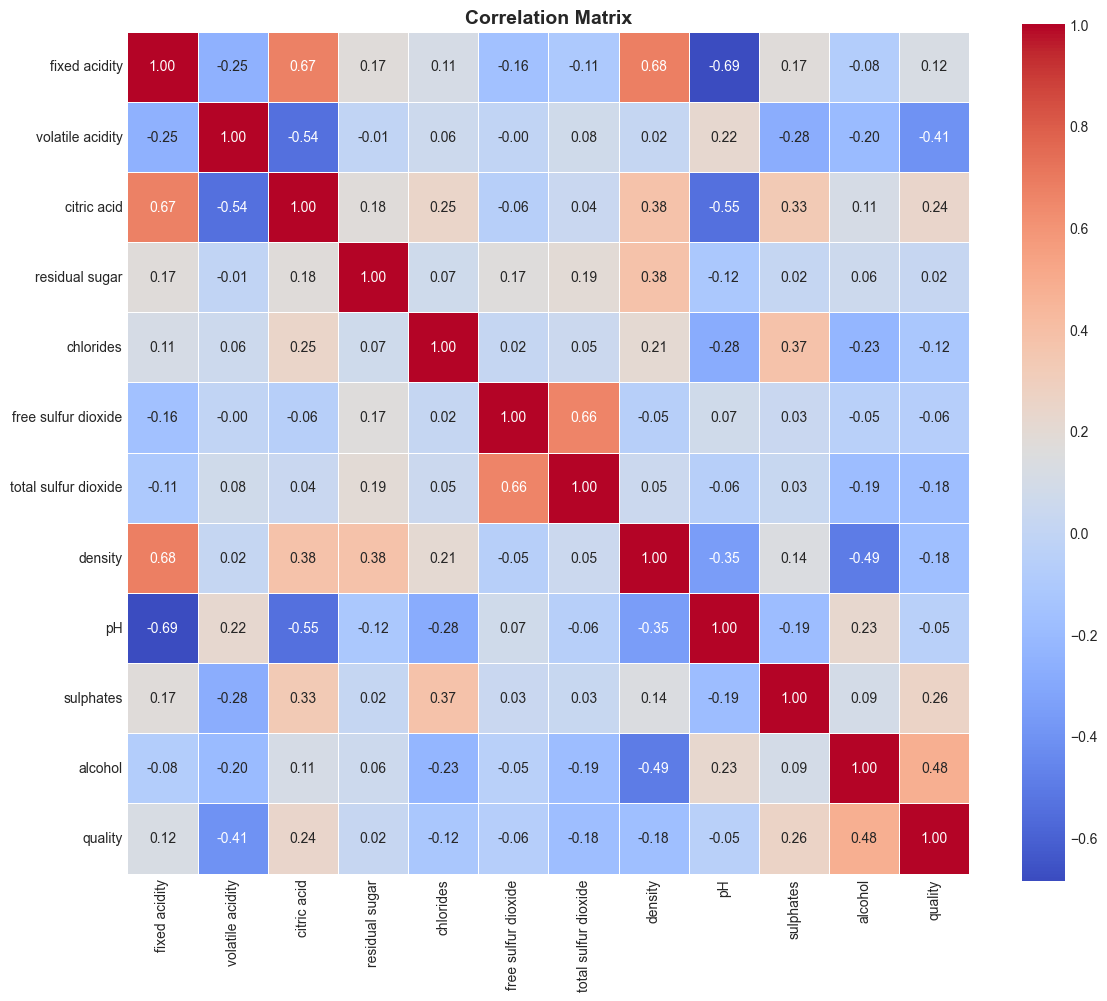


Korelasi dengan Quality (diurutkan):
quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [8]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Korelasi dengan target variable
print("\nKorelasi dengan Quality (diurutkan):")
print(correlation_matrix['quality'].sort_values(ascending=False))

## 4.6 Outlier Detection

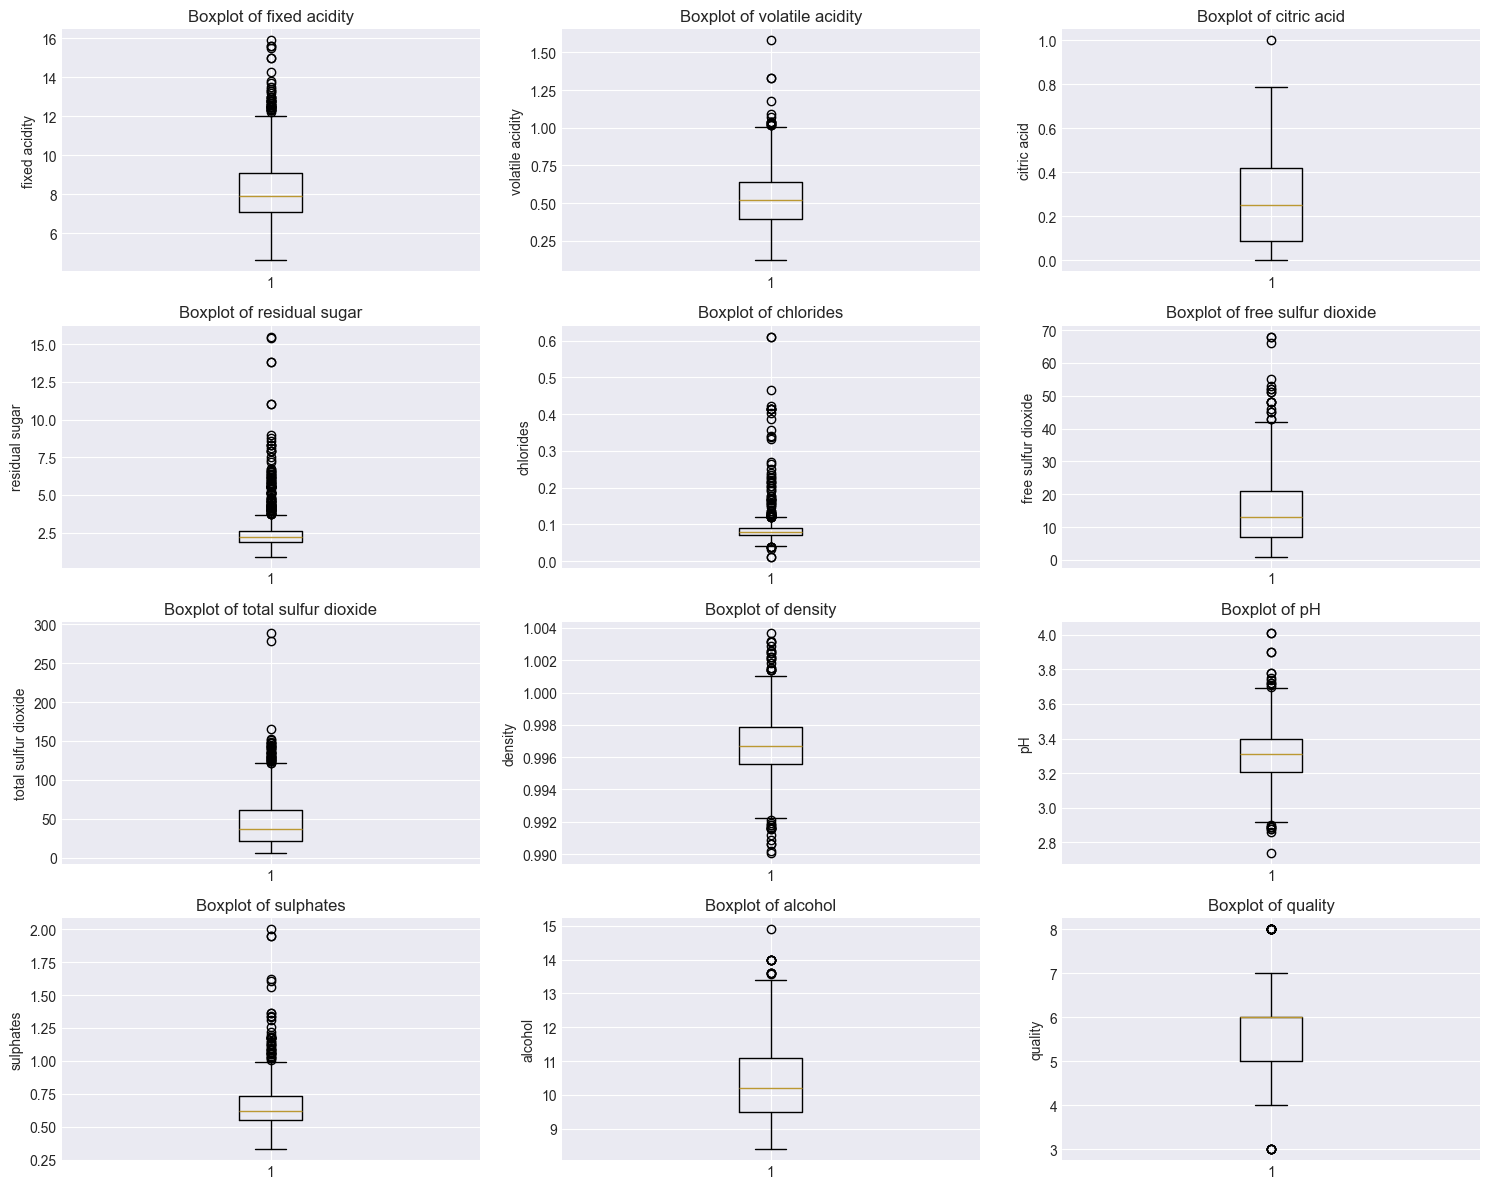


OUTLIER DETECTION (IQR Method)
fixed acidity: 44 outliers (3.85%)
volatile acidity: 14 outliers (1.22%)
citric acid: 1 outliers (0.09%)
residual sugar: 110 outliers (9.62%)
chlorides: 77 outliers (6.74%)
free sulfur dioxide: 18 outliers (1.57%)
total sulfur dioxide: 40 outliers (3.50%)
density: 36 outliers (3.15%)
pH: 20 outliers (1.75%)
sulphates: 43 outliers (3.76%)
alcohol: 12 outliers (1.05%)
quality: 22 outliers (1.92%)


In [13]:
# Boxplot untuk deteksi outlier
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Boxplot of {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

# Hitung outlier menggunakan IQR method
print("\n" + "=" * 50)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 50)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## 5.1 Handle Duplicate Data

In [14]:
# Simpan data original
df_original = df.copy()

# Remove duplicates
print("=" * 50)
print("MENGHAPUS DATA DUPLIKAT")
print("=" * 50)
print(f"Jumlah data sebelum: {len(df)}")
df_clean = df.drop_duplicates()
print(f"Jumlah data sesudah: {len(df_clean)}")
print(f"Data yang dihapus: {len(df) - len(df_clean)}")

MENGHAPUS DATA DUPLIKAT
Jumlah data sebelum: 1143
Jumlah data sesudah: 1143
Data yang dihapus: 0


## 5.2 Handle Outliers

In [15]:
# Handle outliers menggunakan IQR method (capping)
print("=" * 50)
print("MENANGANI OUTLIERS")
print("=" * 50)

df_no_outliers = df_clean.copy()
features_to_cap = [col for col in numeric_cols if col != 'quality']

for col in features_to_cap:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping outliers
    df_no_outliers[col] = df_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)
    
print("✓ Outliers berhasil ditangani dengan capping method")

MENANGANI OUTLIERS
✓ Outliers berhasil ditangani dengan capping method


## 5.3 Feature Engineering

In [16]:
# Drop kolom Id karena tidak relevan untuk modeling
print("=" * 50)
print("FEATURE ENGINEERING")
print("=" * 50)
df_processed = df_no_outliers.copy()
if 'Id' in df_processed.columns:
    df_processed = df_processed.drop('Id', axis=1)
    print("✓ Kolom 'Id' berhasil dihapus")

print(f"\nJumlah fitur sekarang: {df_processed.shape[1]}")
print(f"Fitur: {df_processed.columns.tolist()}")

FEATURE ENGINEERING
✓ Kolom 'Id' berhasil dihapus

Jumlah fitur sekarang: 12
Fitur: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 5.4 Feature Scaling

In [17]:
# Standardization menggunakan StandardScaler
print("=" * 50)
print("FEATURE SCALING")
print("=" * 50)

# Pisahkan features dan target
X = df_processed.drop('quality', axis=1)
y = df_processed['quality']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("✓ Feature scaling berhasil dilakukan")
print("\nStatistik setelah scaling:")
display(X_scaled_df.describe())

FEATURE SCALING
✓ Feature scaling berhasil dilakukan

Statistik setelah scaling:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03
mean,-7.211107e-16,-2.486589e-17,1.118965e-16,-1.864942e-16,-3.481224e-16,4.973178e-17,1.243294e-17,9.404279e-14,5.221836e-16,-4.040707e-16,-3.978542e-16
std,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00
min,-2.252217e+00,-2.352996e+00,-1.366461e+00,-2.335572e+00,-2.306309e+00,-1.487744e+00,-1.305913e+00,-2.479203e+00,-2.620663e+00,-2.338441e+00,-1.907789e+00
25%,-7.180055e-01,-7.886721e-01,-9.080705e-01,-6.944331e-01,-6.156995e-01,-8.705615e-01,-8.052730e-01,-6.268770e-01,-6.927597e-01,-7.256920e-01,-8.779958e-01
50%,-2.270579e-01,-5.674089e-02,-9.315314e-02,-2.020913e-01,-1.085165e-01,-2.533794e-01,-2.712568e-01,-2.436217e-02,-6.919812e-04,-2.125447e-01,-2.226728e-01
75%,5.093635e-01,6.321355e-01,7.726965e-01,4.543644e-01,5.113737e-01,5.695300e-01,5.297676e-01,6.080070e-01,5.925089e-01,5.938297e-01,6.198854e-01
max,2.350417e+00,2.763347e+00,3.293847e+00,2.177561e+00,2.201984e+00,2.729667e+00,2.532328e+00,2.460333e+00,2.520412e+00,2.573112e+00,2.866707e+00


## 5.5 Train-Test Split

In [18]:
# Split data menjadi training dan testing set
print("=" * 50)
print("TRAIN-TEST SPLIT")
print("=" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

print("\nDistribusi quality di training set:")
print(y_train.value_counts().sort_index())
print("\nDistribusi quality di testing set:")
print(y_test.value_counts().sort_index())

TRAIN-TEST SPLIT
Training set size: 914 samples
Testing set size: 229 samples

Training set shape: (914, 11)
Testing set shape: (229, 11)

Distribusi quality di training set:
quality
3      5
4     26
5    386
6    370
7    114
8     13
Name: count, dtype: int64

Distribusi quality di testing set:
quality
3     1
4     7
5    97
6    92
7    29
8     3
Name: count, dtype: int64


## 5.6 Save Processed Data

In [19]:
# Gabungkan kembali X dan y untuk disimpan
df_final = X_scaled_df.copy()
df_final['quality'] = y

# Save processed data
output_path = 'WineQT_preprocessing.csv'
df_final.to_csv(output_path, index=False)

print("=" * 50)
print("SAVE PROCESSED DATA")
print("=" * 50)
print(f"✓ Data berhasil disimpan ke: {output_path}")
print(f"\nShape data final: {df_final.shape}")
print(f"Kolom: {df_final.columns.tolist()}")

print("\n5 Baris pertama data yang sudah diproses:")
display(df_final.head())

SAVE PROCESSED DATA
✓ Data berhasil disimpan ke: WineQT_preprocessing.csv

Shape data final: (1143, 12)
Kolom: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

5 Baris pertama data yang sudah diproses:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.533900,0.976574,-1.366461,-0.694433,-0.277578,-0.459107,-0.371385,0.583581,1.317532,-0.652385,-0.971613,5
1,-0.288426,2.009888,-1.366461,0.454364,0.962203,0.980985,0.730024,0.040775,-0.725715,0.227296,-0.597143,5
2,-0.288426,1.321012,-1.162732,-0.037977,0.624081,-0.047652,0.296135,0.149336,-0.330248,0.007376,-0.597143,5
3,1.798101,-1.434494,1.485749,-0.694433,-0.333931,0.158075,0.496392,0.692142,-0.989360,-0.505772,-0.597143,6
4,-0.533900,0.976574,-1.366461,-0.694433,-0.277578,-0.459107,-0.371385,0.583581,1.317532,-0.652385,-0.971613,5
